In [1]:
# run this cell if you don't have the pandas, matplotlib, numpy or sklearn libraries installed on your environment
import sys  
!{sys.executable} -m pip install --user seaborn
!{sys.executable} -m pip install --user pandas
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user scikit-learn
!{sys.executable} -m pip install --user yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv('./hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
df.shape

(25000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

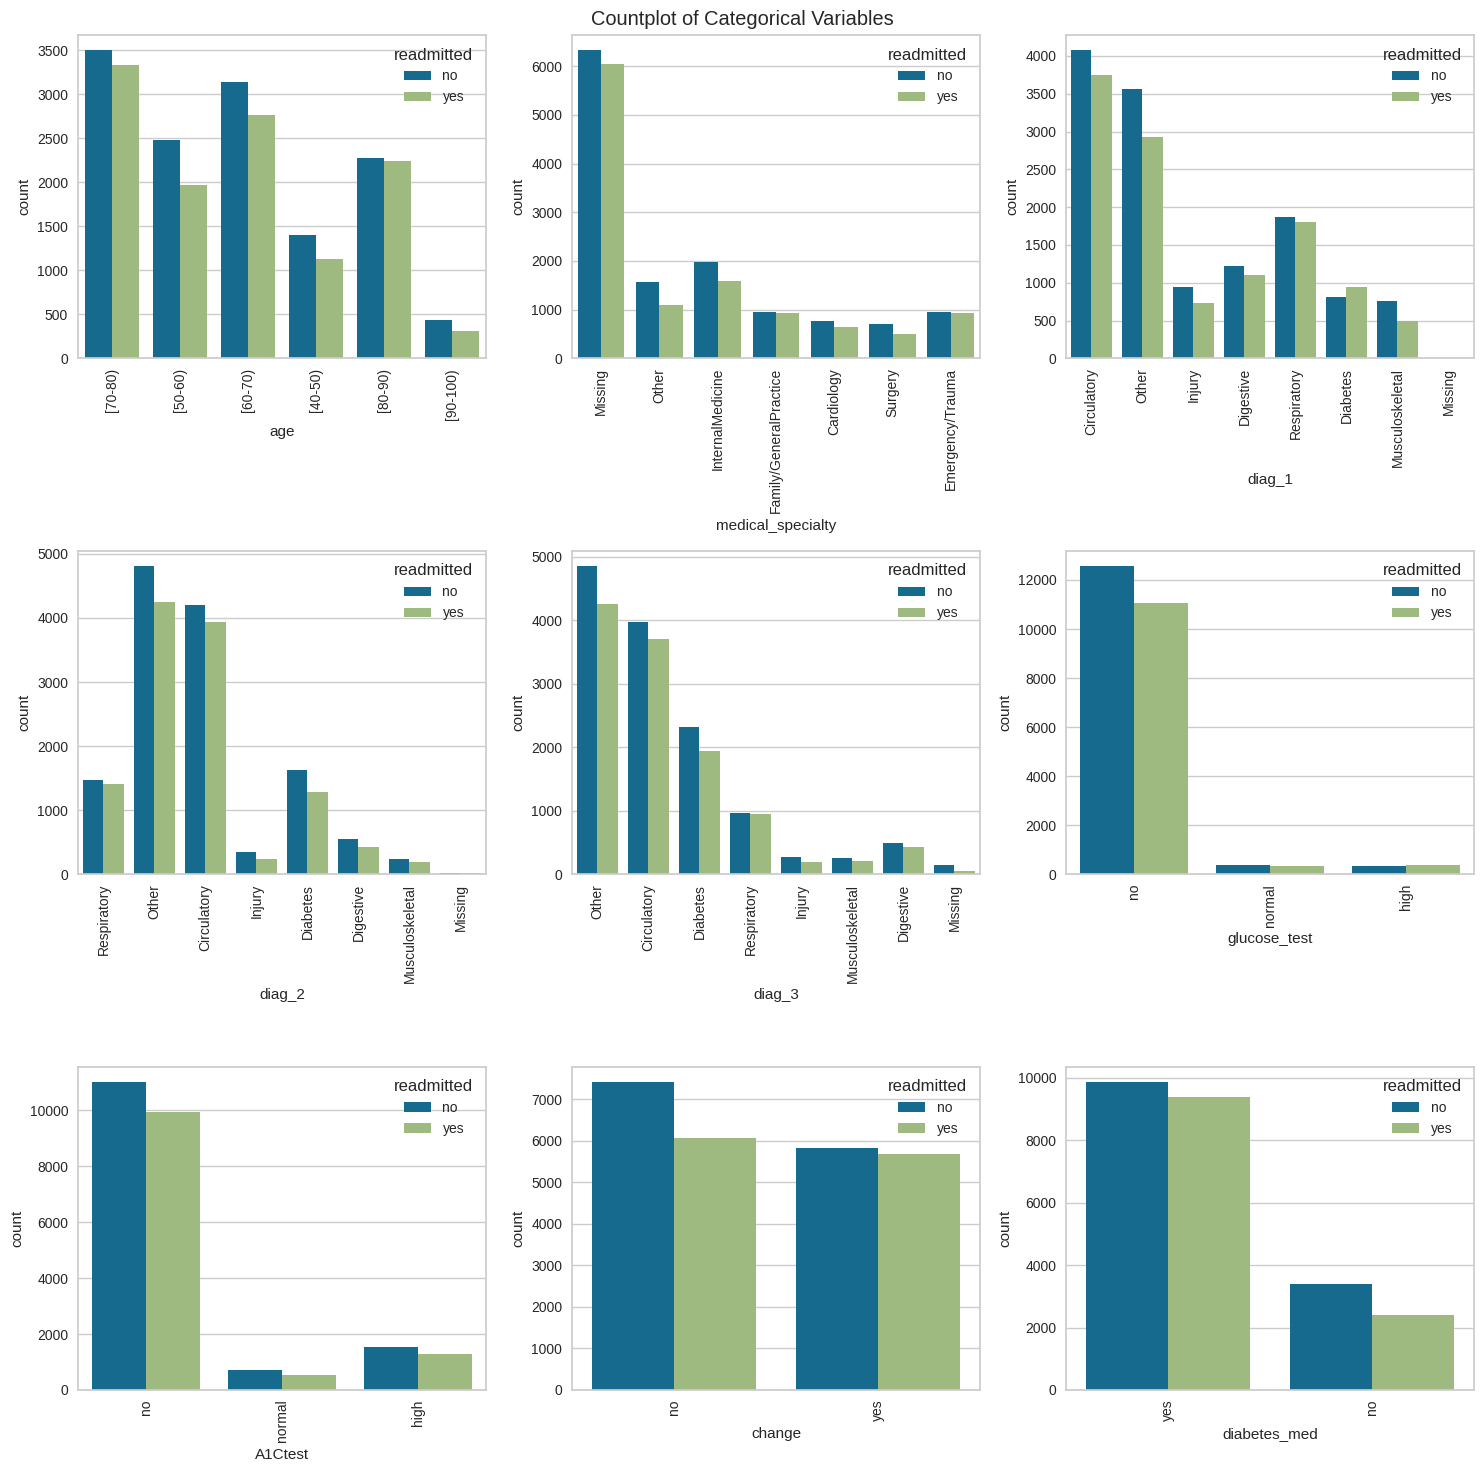

In [6]:
# DATA Analysis

# plotting categorical data
categorial_variables = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# creating figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = axs.flatten()


fig.suptitle("Countplot of Categorical Variables")

for i,var in enumerate(categorial_variables):
    sns.countplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()    
plt.show()

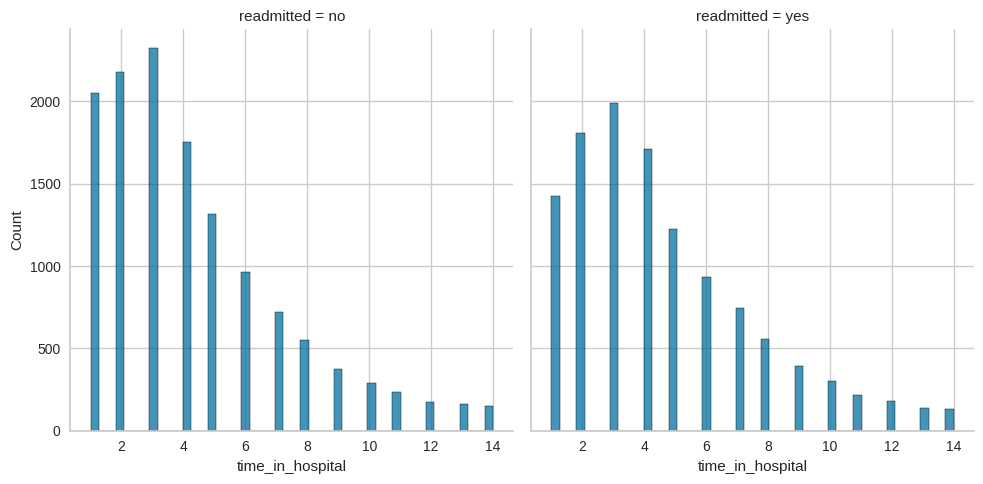

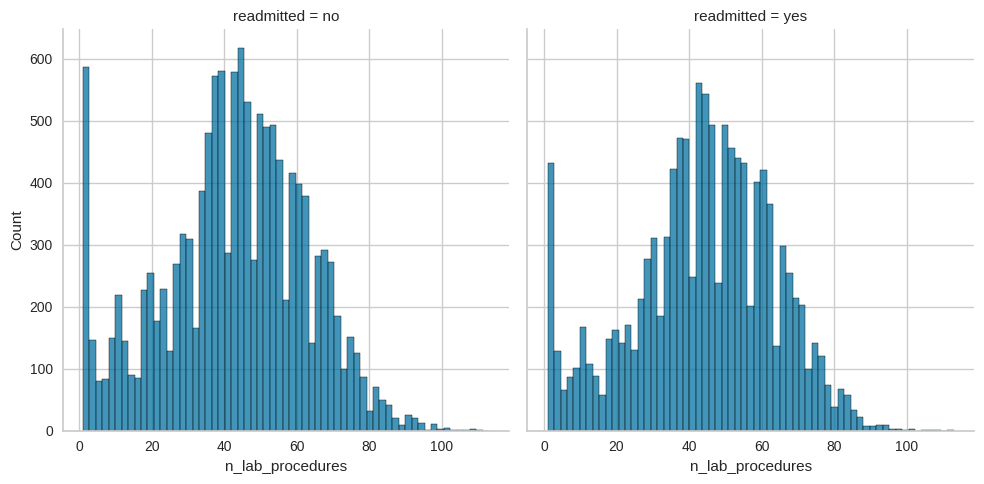

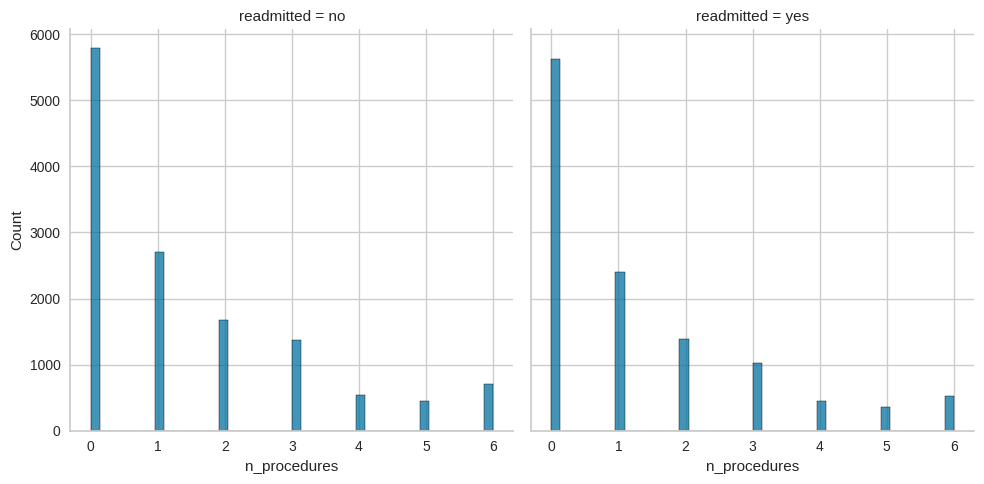

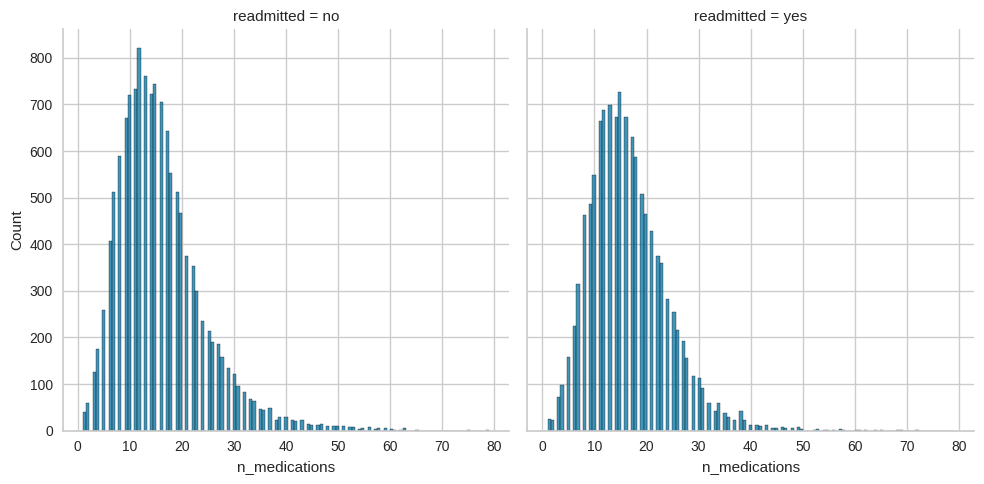

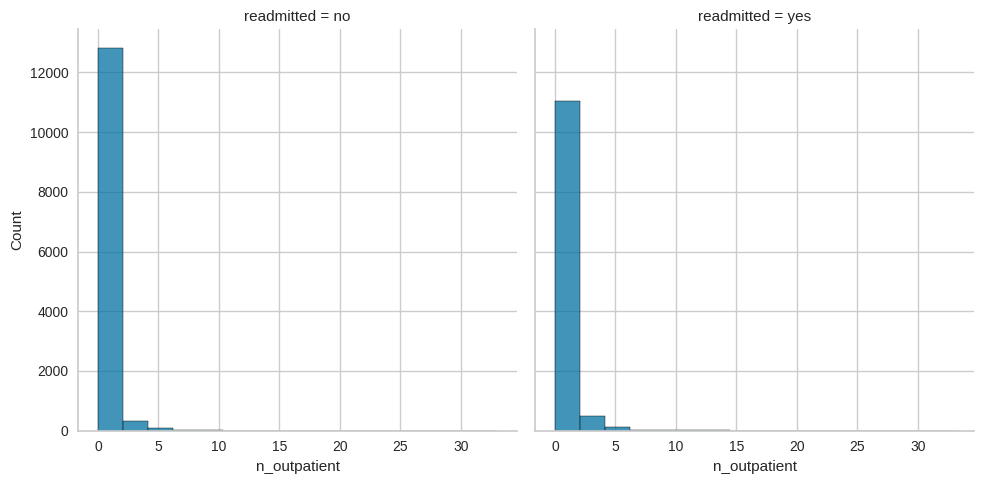

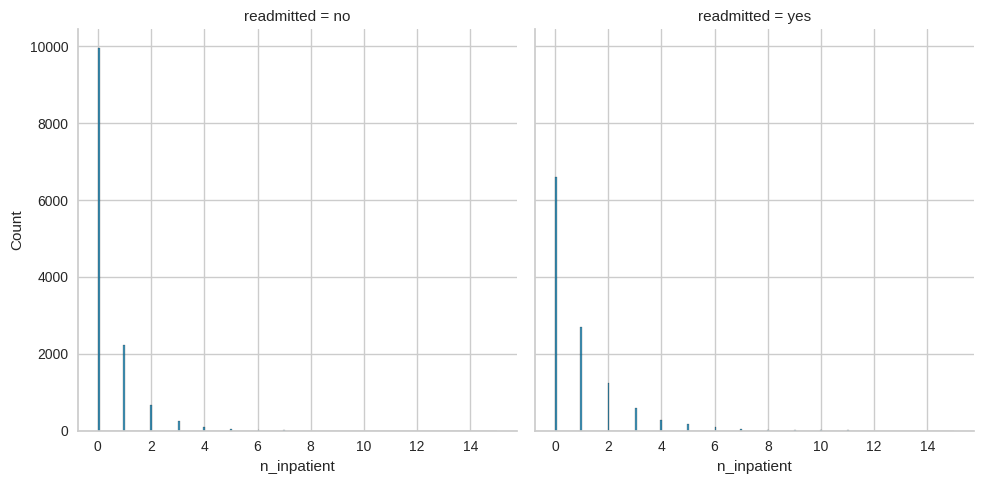

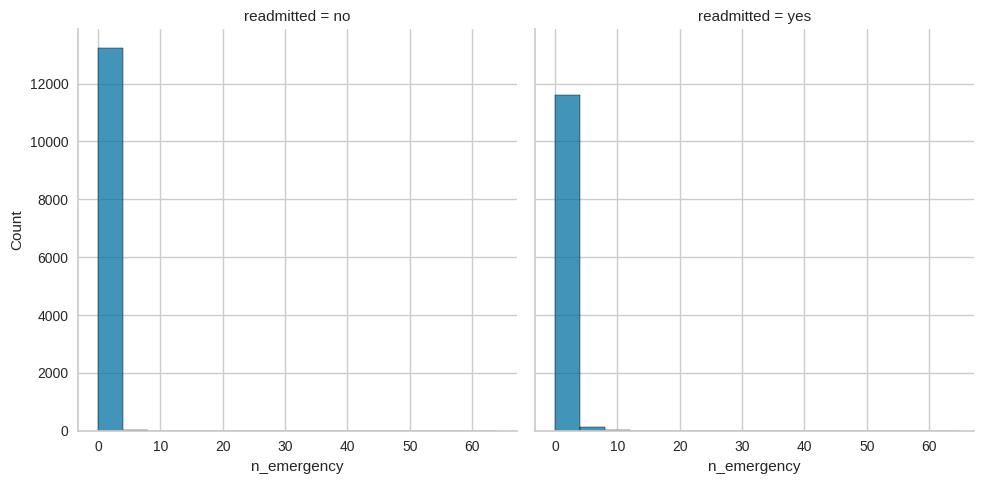

In [7]:
numerical_variable = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']
# DATA Analysis

# plotting numerical data

for i,var in enumerate(numerical_variable):
    sns.displot(x=var, data=df, col='readmitted',col_wrap=2)


In [8]:
#looping over each column
for col in df.select_dtypes(include='object').columns:
    # initializing a labelencoder object
    le = LabelEncoder()
    
    # transform values of the column
    df[col] = le.fit_transform(df[col])
    
    # print unique encoded of value of each column
    print(f"{col}:{df[col].unique()}")

df.head()

age:[3 1 2 0 4 5]
medical_specialty:[4 5 3 2 0 6 1]
diag_1:[0 6 3 2 7 1 5 4]
diag_2:[7 6 0 3 1 2 5 4]
diag_3:[6 0 1 7 3 5 2 4]
glucose_test:[1 2 0]
A1Ctest:[1 2 0]
change:[0 1]
diabetes_med:[1 0]
readmitted:[0 1]


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0


In [9]:
x = df.drop(['readmitted'], axis=1)
y = df['readmitted']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)
train_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1705,1,5,64,6,22,0,0,0,4,0,6,0,1,1,0,0,0
11692,2,1,62,3,20,0,0,0,6,6,0,6,1,1,1,1,0
17299,3,6,85,1,17,14,1,0,4,1,0,5,1,0,1,1,0
12712,0,1,33,0,9,0,2,0,3,6,1,6,1,1,0,0,1
4895,1,3,58,1,8,2,0,0,3,2,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19856,1,2,50,1,18,0,0,0,5,6,0,6,1,1,1,1,0
12946,4,9,42,1,31,0,2,1,5,0,0,6,1,1,1,1,0
4681,2,9,31,3,29,0,0,0,5,5,3,1,1,1,1,1,0
1443,5,4,53,1,14,1,0,1,3,0,6,6,1,1,0,0,1


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<Axes: >

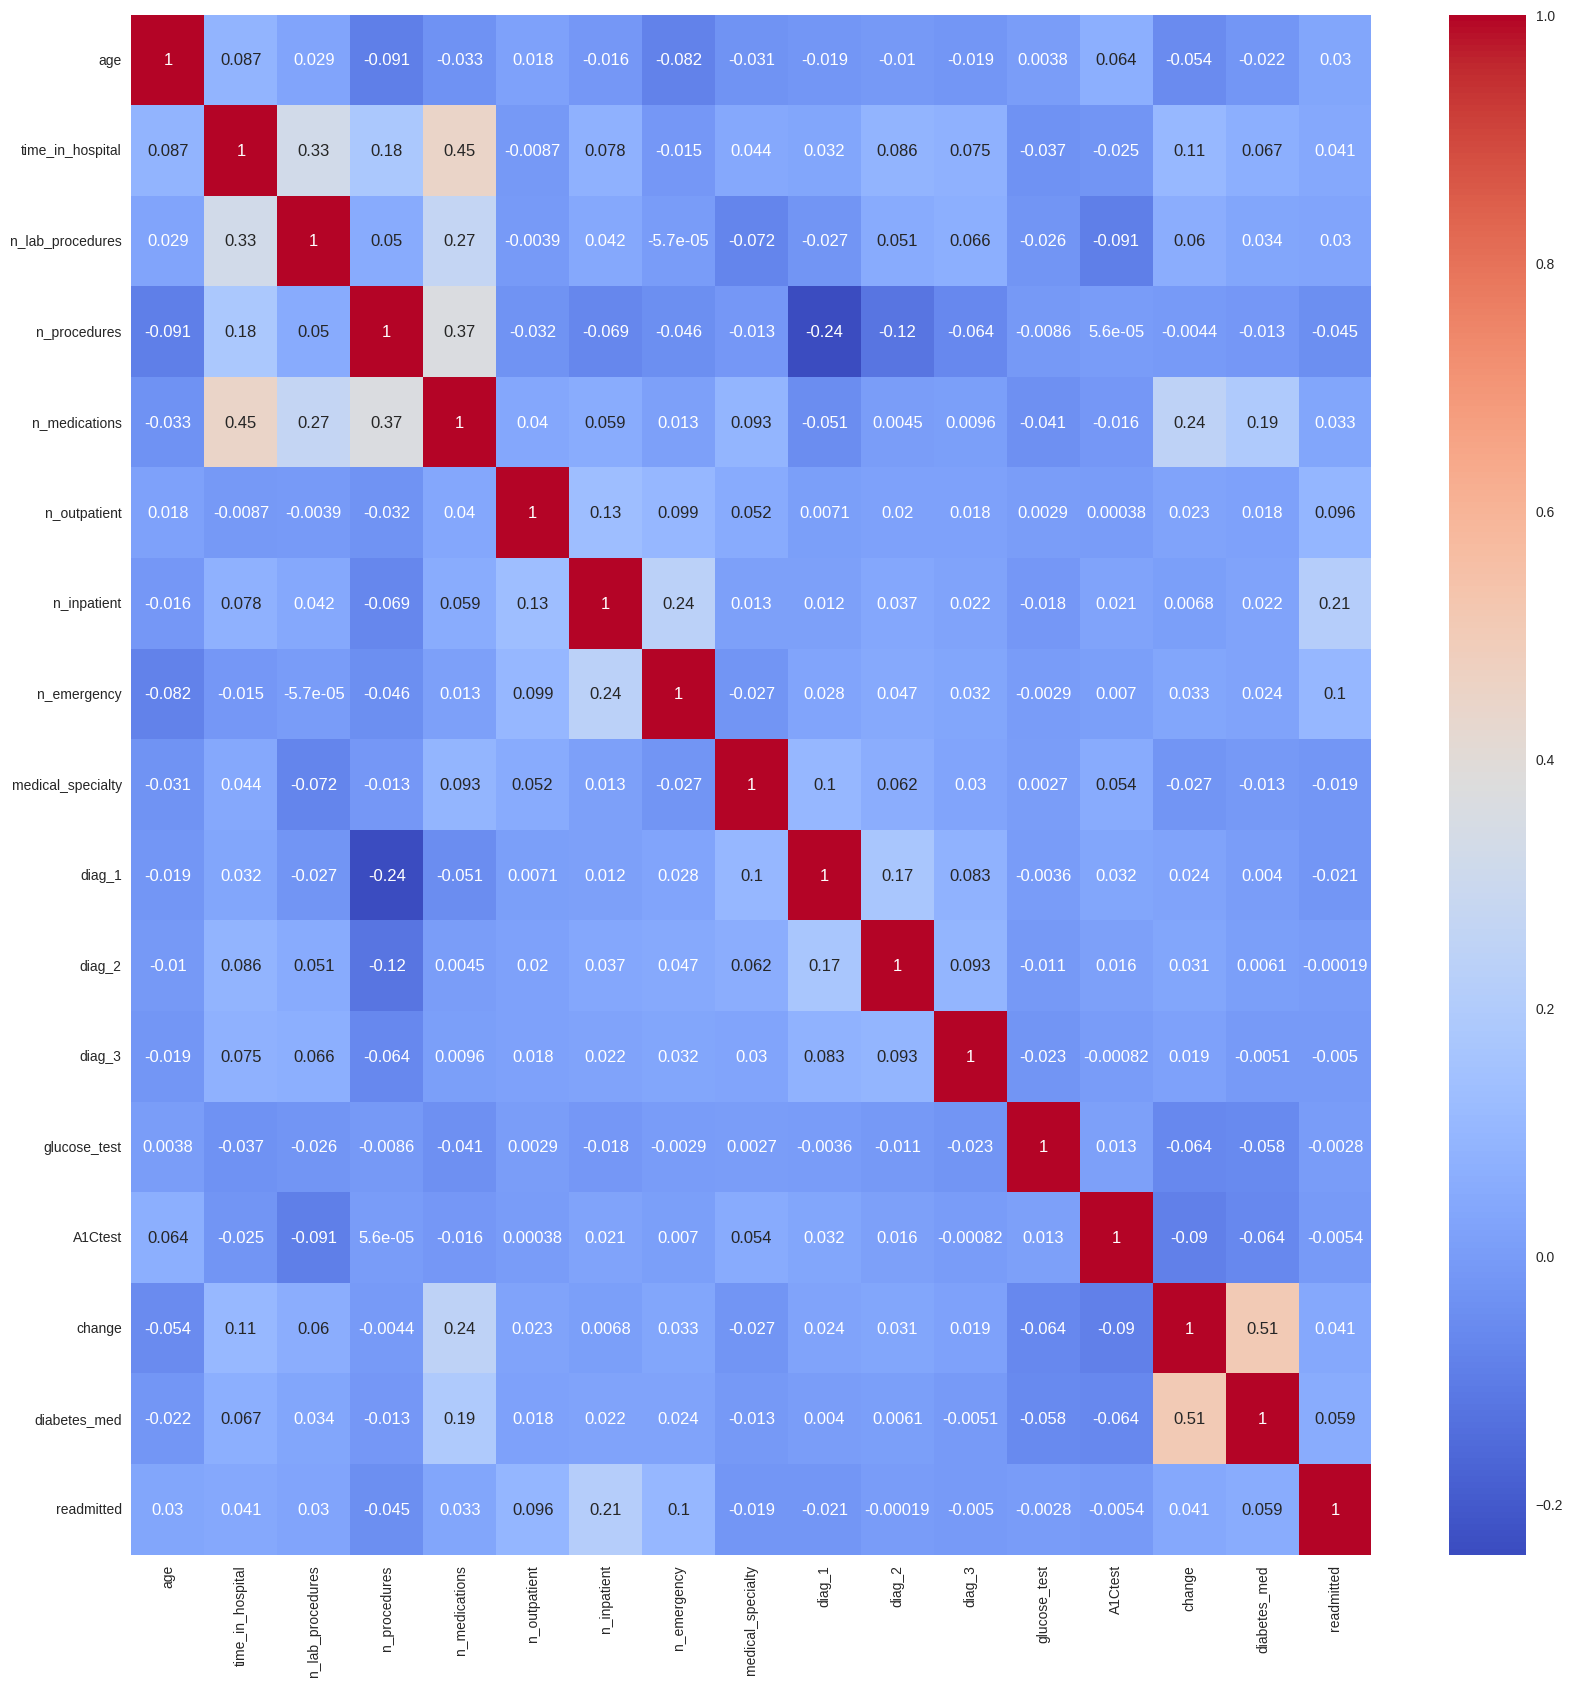

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

Coefficients: [[ 0.06191912  0.05174542  0.02077479 -0.08322165  0.01812845  0.15514877
   0.44814716  0.17090195 -0.04078568 -0.06205669 -0.025298   -0.02942721
   0.00801504 -0.01111173  0.02196499  0.08963536]]
Intercept: [-0.10810363]


0.6054

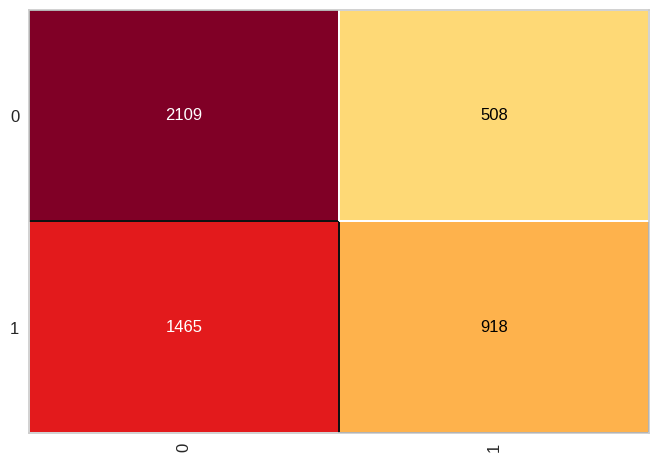

In [25]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(x_train, y_train)
previsoes = logistic.predict(x_test)


# Get the coefficients and intercept
coefficients = logistic.coef_
intercept = logistic.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


cm = ConfusionMatrix(logistic, classes=logistic.classes_, label_encoder={0: 'Class 0', 1: 'Class 1'})
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

Coefficients: [0.05407138 0.06597528 0.03729143]
Intercept: [-0.12627303]


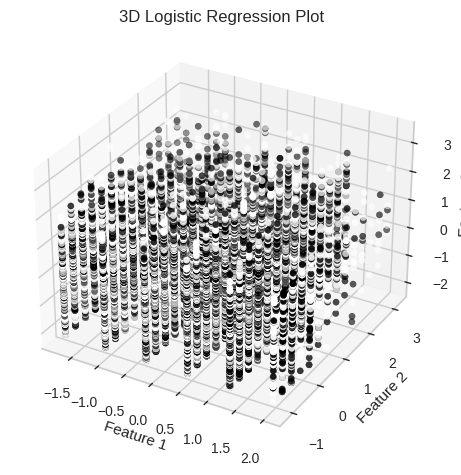

In [19]:
selected_features = x_train[:, :3]

# Fit a logistic regression model using only the selected features
logistic = LogisticRegression(random_state=1, max_iter=1000)
logistic.fit(selected_features, y_train)

# Get coefficients and intercept
coefficients = logistic.coef_.flatten()
intercept = logistic.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(selected_features[:, 0], selected_features[:, 1], selected_features[:, 2], c=y_train, marker='o', label='Data Points')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Logistic Regression Plot')

# Show the plot
plt.show()